## Scikit-Learn으로 머신러닝 구현해보기

### 머신러닝 알고리즘
머신러닝의 알고리즘 종류는 크게 3가지로 나눌 수 있다. 
- 지도학습 (Supervised Learning)
- 비지도학습 (Unsupervised Learning)
- 강화학습 (Reinforcement Learning)

### 지도학습과 비지도학습
지도학습에 속하는 대표적인 알고리즘
- 분류(Classification) : 예측해야 할 데이터가 categorical 변수일 때
- 회귀(Regression) : 예측해야할 데이터가 연속적인 값일 때
- 예측(Forecasting) : 과거 및 현재의 데이터로 미래를 예측하는 과정  

비지도학습에 속하는 대표적인 알고리즘
- 클러스터링 : 특정 기준에 따라 유사한 데이터끼리 그룹화
- 차원 축소 : 고려해야할 변수를 줄이는 작업으로, 변수와 대상 간의 진정한 관계를 도출하기에 용이   


보통 라벨(정답)의 존재 유무에 따라 머신러닝을 지도학습과 비지도학습으로 나눈다.  
데이터가 매우 복잡하다면 차원을 축소하기도 하고 만약 주요한 성분이 있다면 주성분 분석을 적용하기도 한다.  
또한, 데이터의 종류에 따라 같은 회귀라도 선형회귀는 수치형 데이터(연속적인 데이터)를 예측하는데 사용된다면,  
로지스틱 회귀는 분류(엄밀히 말하면 이진 분류)에 사용된다.  
따라서 정답 유무, 데이터의 종류, 특성, 문제 정의에 따라 머신러닝 알고리즘은 굉장히 복합적으로 사용된다.  

### 강화학습
강화학습은 앞에서 언급한 지도학습, 비지도학습과는 다른 종류의 알고리즘이다. 학습하는 시스템을 에이전트라고 하고, 환경을 관찰해서 에이전트가 스스로 행동하게 한다. 모델은 그 결과로 특정 보상을 받아 이 보상을 최대화하도록 학습한다. 기본적으로 쓰이는 용어는 다음과 같다.  
- 에이전트(agent) : 학습 주체(혹은 actor, controller)
- 환경(environment) : 에이전트에게 주어진 환경, 상황, 조건
- 행동(action) : 환경으로부터 주어진 정보를 바탕으로 에이전트가 판단한 행동
- 보상(reward) : 행동에 대한 보상을 머신러닝 엔지니어가 설계. 

강화학습에 속하는 대표적인 알고리즘
- Monte Carlo methods
- Q-Learning
- Policy Gradient methods

In [1]:
# 모듈 import 및 버전 확인
import sklearn
print(sklearn.__version__)

1.0.1


### 데이터 표현법
사이킷런에서 제공하는 데이터셋은 NumPy의 ndarray, Pandas의 DataFrame, SciPy의 Sparse Matrix를 이용해 나타낼 수 있다.  
사이킷런에서는 데이터 표현 방식을 보통 2가지로 나타내는데, 특성 행렬(Feature Matrix)과 타겟 벡터(Target Vector)다.  

#### 특성 행렬(Feature Matrix)
- 입력 데이터를 의미한다.
- feature : 데이터의 수치 값, 이산 값, 불리언 값으로 표현되는 개별 관측치를 의미한다. 특성 행렬에서의 열에 해당.
- sample : 각 입력 데이터, 특성 행렬에서는 행에 해당.
- `n_samples` : 행의 개수(sample의 개수)
- `n_features` : 열의 개수(feature의 개수)
- `X` : 통상 특성 행렬은 변수명 X로 표기한다.
- `[n_samples, n_features]`은 2차원 배열 구조이며 Numpy의 ndarray, Pandas의 DataFrame, SciPy의 Sparse Matrix를 사용해 나타낼 수 있다.  


#### 타겟 벡터(Target Vector)
- 입력 데이터의 라벨(정답)을 의미한다.
- target : 라벨, 타겟값, 목표라고도 부르며 특성 행렬로부터 예측하고자 하는 것을 의미한다.
- `n_samples` : 벡터의 길이(라벨의 개수)
- 타겟 벡터는 보통 1차원 벡터로 나타내며, Numpy의 ndarray, Pandas의 Series를 사용해 나타낼 수 있다.

### 회귀 모델 실습

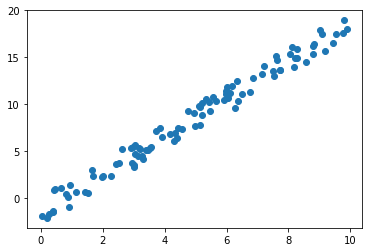

In [2]:
import numpy as np
import matplotlib.pyplot as plt

r = np.random.RandomState(10)
x = 10 * r.rand(100)
y = 2 * x - 3 * r.rand(100)
plt.scatter(x, y)

In [3]:
print(x.shape, y.shape) # x, y의 모양은 1차원 벡터다.

(100,) (100,)


사이킷런에서 머신러닝 모델을 사용하기 위해 모델 객체를 생성한다.  
지금 사용할 모델의 이름은 `LinearRegression`이며, `sklearn.linear_model` 안에 있다.

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

`LinearRegression` 모델이 잘 생성되었다. `fit()` 메서드로 모델을 훈련시킨다.  
`fit()` 메서드에 인자로 특성 행렬과 타겟 벡터를 넣어 준다. 즉, 행렬 형태의 입력 데이터와 1차원 벡터 형태의 정답을 넣는다.

In [6]:
model.fit(x, y) # 에러 발생

ValueError: ignored

입력 데이터인 `x`를 그대로 넣으면, 에러가 발생한다. `x`는 numpy의 ndarray 타입이기 때문에 `reshape()` 메서드로 행렬로 바꿔준다.  
통상 특성 행렬의 변수명은 `X`로 하기에, 여기에 특성 행렬을 넣어보자.

In [7]:
X = x.reshape(100,1)
model.fit(X, y)

LinearRegression()

입력 데이터와 그 라벨을 이용해 훈련을 끝냈으므로, 새로운 데이터를 넣고 예측해보자.  
새로운 데이터는 `np.linspace()`를 이용해 생성하고, 예측은 `predict()`를 사용한다.  
`predict()`의 인자 역시 행렬로 넣어줘야 한다.

In [8]:
x_new = np.linspace(-1, 11, 100)
X_new = x_new.reshape(100, 1)
y_new = model.predict(X_new)

학습된 회귀 모델이 잘 예측했는지 모델의 성능을 평가해보자.  
모델의 성능 평가 관련 모듈은 `sklearn.metrics`에 저장되어 있고, 회귀 모델의 경우 RMSE(Root Mean Square Error)를 사용해 성능을 평가한다.

In [9]:
from sklearn.metrics import mean_squared_error

error = np.sqrt(mean_squared_error(y, y_new))

print(error)

9.299028215052264


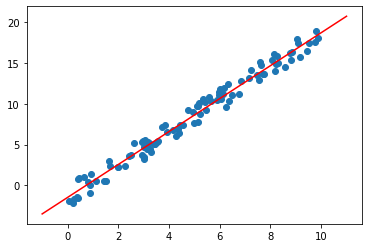

In [10]:
plt.scatter(x, y, label='input data')
plt.plot(X_new, y_new, color='red', label='regression line')

### 사이킷런의 datasets 모듈
사이킷런은 데이터셋을 모듈로 제공하고 있으며 데이터에 대한 내용은 아래 문서를 참고하자. 

- [Scikit-learn: Dataset loading utilities](https://scikit-learn.org/stable/datasets). 

`sklearn.datasets` 모듈은 크게 dataset loaders와 dataset fetchers로 나뉘며, 각각 `Toy dataset`과 `Real World dataset`을 제공한다.  


#### datasets.load_wine() 뜯어보기
와인 분류 데이터를 다운로드하고 `data` 변수에 할당한 후, 자료형을 확인해보자.

In [11]:
from sklearn.datasets import load_wine

data = load_wine()
type(data)

sklearn.utils.Bunch

`Bunch`는 파이썬의 딕셔너리와 유사한 형태의 데이터 타입이다.

In [12]:
print(data)
data.keys()

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [13]:
data.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

특성 행렬은 2차원이며 행에는 데이터의 개수(`n_samples`)가, 열에는 특성의 개수(`n_features`)가 들어있다.

In [15]:
data.data.shape # feature가 13개, 데이터가 178개인 특성 행렬

(178, 13)

In [16]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [18]:
data.target.shape # 타겟 벡터는 1차원이고 길이가 특성 행렬의 데이터 개수와 같다.

(178,)

In [19]:
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [20]:
data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [21]:
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

#### DataFrame으로 나타내기
특성 행렬을 Pandas의 DataFrame으로 나타낼 수 있다.

In [22]:
import pandas as pd

pd.DataFrame(data.data, columns=data.feature_names)

alcohol  malic_acid   ash  ...   hue  od280/od315_of_diluted_wines  proline
0      14.23        1.71  2.43  ...  1.04                          3.92   1065.0
1      13.20        1.78  2.14  ...  1.05                          3.40   1050.0
2      13.16        2.36  2.67  ...  1.03                          3.17   1185.0
3      14.37        1.95  2.50  ...  0.86                          3.45   1480.0
4      13.24        2.59  2.87  ...  1.04                          2.93    735.0
..       ...         ...   ...  ...   ...                           ...      ...
173    13.71        5.65  2.45  ...  0.64                          1.74    740.0
174    13.40        3.91  2.48  ...  0.70                          1.56    750.0
175    13.27        4.28  2.26  ...  0.59                          1.56    835.0
176    13.17        2.59  2.37  ...  0.60                          1.62    840.0
177    14.13        4.10  2.74  ...  0.61                          1.60    560.0

[178 rows x 13 columns]

In [24]:
X = data.data
y = data.target

In [27]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X, y)
y_pred = model.predict(X)

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# 타겟 벡터, 라벨인 변수명 y와 예측값 y_pred를 각각 인자로 넣는다.
print(classification_report(y, y_pred))
# 정확도를 출력한다.
print("accuracy = ", accuracy_score(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        71
           2       1.00      1.00      1.00        48

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178

accuracy =  1.0


### 사이킷런의 Estimator

데이터셋을 기반으로 머신러닝 모델의 파라미터를 추정하는 객체를 `Estimator`라고 한다. 사이킷런의 모든 머신러닝 모델은 `Estimator`라는 파이썬 클래스로 구현되어 있다. 추정을 하는 과정, 즉 훈련은 `Estimator`의 `fit()` 메서드를 통해 이루어지고, 예측은 `predict()` 메서드를 통해 이루어진다.  
사이킷런의 `Estimator` 객체를 사용하면 지도학습, 비지도학습에 관계없이 학습과 에측이 가능하다.


#### 훈련 데이터와 테스트 데이터 직접 분리하기
보통 훈련 데이터와 테스트 데이터의 비율은 8:2로 설정한다. 

In [30]:
from sklearn.datasets import load_wine

data = load_wine()
print(data.data.shape)
print(data.target.shape)

(178, 13)
(178,)


In [31]:
X_train = data.data[:142]
X_test = data.data[142:]
print(X_train.shape, X_test.shape)

(142, 13) (36, 13)


In [33]:
y_train = data.target[:142]
y_test = data.target[142:]
print(y_train.shape, y_test.shape)

(142,) (36,)


In [34]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
y_pred = model.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score

print("정답률 : ", accuracy_score(y_test, y_pred))

정답률 :  0.9444444444444444


#### `train_test_split` 사용해서 분리하기
훈련 데이터와 테스트 데이터 분리는 필수 기능이다. 훈련에 쓴 데이터를 예측에 사용하면 항상 정확도는 100%가 나올 것이기 때문이다. 사이킷런에서는 이 필수 기능을 당연히 API로 제공한다. `model_selection`의 `train_test_split()` 메서드다.

In [38]:
from sklearn.model_selection import train_test_split

result = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
print(type(result))
print(len(result))

<class 'list'>
4


In [41]:
result[0].shape

(142, 13)

In [42]:
result[1].shape

(36, 13)

In [45]:
result[2].shape

(142,)

In [44]:
result[3].shape

(36,)

0번 원소부터 훈련 데이터용 특성 행렬, 테스트 데이터용 특성 행렬, 훈련 데이터용 타겟 벡터, 테스트 데이터용 타겟 벡터다.  
우리는 이 함수를 아래와 같이 unpacking해서 쓴다.

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)